In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from time import sleep

pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

In [2]:
def generaPath(tipo, nombre):
    prepath = str(os.getcwd())
    if (tipo == "I"):
        path = prepath + '\\origen\\' + nombre
    else :
        path = prepath + '\\generados\\' + nombre
    return path

In [3]:
df_tr_fu_filt_delta = pd.read_csv(generaPath('O', 'df_tr_fu_filt_delta.csv'))
df_re_fu_filt_delta = pd.read_csv(generaPath('O', 'df_re_fu_filt_delta.csv'))

In [4]:
conteos_1d_sb_tr = pd.read_csv(generaPath('O', 'conteos_1d_sb_tr.csv'))
conteos_1d_sb_re = pd.read_csv(generaPath('O', 'conteos_1d_sb_re.csv'))

In [5]:
conteos_1d_tr = pd.read_csv(generaPath('O', 'conteos_1d_tr.csv'))
conteos_1d_re = pd.read_csv(generaPath('O', 'conteos_1d_re.csv'))

In [6]:
conteos_2d_tr = pd.read_csv(generaPath('O', 'conteos_2d_tr.csv'))
conteos_2d_re = pd.read_csv(generaPath('O', 'conteos_2d_re.csv'))

In [7]:
conteos_3d_tr = pd.read_csv(generaPath('O', 'conteos_3d_tr.csv'))
conteos_3d_re = pd.read_csv(generaPath('O', 'conteos_3d_re.csv'))

In [8]:
conteos_4d_tr = pd.read_csv(generaPath('O', 'conteos_4d_tr.csv'))
conteos_4d_re = pd.read_csv(generaPath('O', 'conteos_4d_re.csv'))

In [9]:
conteos_5d_tr = pd.read_csv(generaPath('O', 'conteos_5d_tr.csv'))
conteos_5d_re = pd.read_csv(generaPath('O', 'conteos_5d_re.csv'))

#### Establezco los valores de inicio de los sorteos para calcular deltas

In [10]:
df_topes = df_tr_fu_filt_delta.iloc[0::1,[0]]
recent = df_topes.max()
print("sorteo mas reciente ", recent)
oldest = df_topes.min()
print("sorteo inicial ", oldest)

sorteo mas reciente  idSorteo    2098
dtype: int64
sorteo inicial  idSorteo    1671
dtype: int64


#### Se calcula los valores de diferencia entre los diversos sorteos

In [11]:
def calcular_deltas_verticales(df):
    delticas = []
    previo = recent
    for index, row in df.iterrows():
        resta = int(previo) - int(row[0])
        #print("resta : ", resta, " previo ", previo, " Sorteo: ", row[0], )
        delticas.append(int(resta))
        previo = int(row[0])
    resta = int(previo) - int(oldest)
    #print(resta)
    delticas.append(int(resta))
    return delticas

In [12]:
def unsplited_tupla(sbs):
    delticas = []
    partido = sbs.split(sep='|') if (sbs.find("|") >= 1) else sbs
    return partido

In [13]:
def calc_media(df):
    acum = 0
    media = 0
    length = len(df) 
    for i in range(length): 
        acum += int(df[i])
    media = int(acum/length)
    #print("valor de media: ", media)
    return media

In [14]:
def calc_moda(df):
    repetir = 0                                                                         
    for i in df:                                                                              
        aparece = df.count(i)                                                             
        if aparece > repetir:                                                       
            repetir = aparece 
    
    moda = []                                                                               
    for i in df:                                                                              
        aparece = df.count(i)
        #print("aparece ", aparece)
        if aparece == repetir and i not in moda:                                   
            moda.append(i) 
            #print("moda", moda)
            
    return moda

In [15]:
def calc_cant_moda(df_deltas, df_elected):
    #print(df_elected)
    num = str(df_elected[0])
    partido = num.split(sep='|') if (num.find("|") >= 1) else num
    
    #print(partido)
    repetir = 0                                                                         
    for i in df_deltas:
        #print("valor de i :", i)
        aparece = df_deltas.count(df_elected[0])   
        #print("valor de aparece:", aparece)
        if aparece > repetir:                                                       
            repetir = aparece 
    
    moda = []                                                                               
    for i in df_deltas:                                                                              
        aparece = df_deltas.count(i)
        #print("aparece ", aparece)
        if aparece == repetir and i not in moda:                                   
            moda.append(i) 
            #print("moda", moda)
    #print("fin ciclo", moda)        
    return moda

In [16]:
def sumarcol_peso(ldf):
    #print("valor de ldf", ldf)
    df = pd.DataFrame(ldf)
    #print("columna conteo ", df['conteo'])
    suma = ldf.sum()
    #suma = sumalista(df)
    print("valor de suma ", suma  )
    pesos = []                                                                               
    for index, row in df.iterrows():
        cant_tupla = int(row[0])
        #print("can_tupla ", cant_tupla)
        if cant_tupla > 0:
            dividido = cant_tupla /suma 
        pesos.append(float(dividido))  
    #print(type(pesos))
    return pesos

In [17]:
def sumalista(df):
    acum = 0
    #print("valor de listaNumeros ", df)
    for index, row in df.iterrows():
        cant_tupla = int(row[0])
        #print("can_tupla ", cant_tupla)
        acum = acum + cant_tupla
        print(acum)
    return acum

In [18]:
def entire_part(res1):
    pd, pe = math.modf(res1)
    #print("entire Part: ", pe, " decimal part: ", pd)
    if (int(pe) >= int(1)):
        res = pd
    else: 
        res = 1 - pd
    #print("res en entire_part", res)
    return res

In [19]:
def set_hot_level(last_number, evaluated_number ):
    #print("last:",int(last_number), " evaluated ",int(evaluated_number))
    if (int(last_number) > int(0) & int(evaluated_number) > int(0)):
        num = float(int(last_number) /int(evaluated_number))
    else:
        num = int(0)
    #print("num:", num)
    ret = entire_part(num)
    return ret

In [20]:
def set_closer_to_1(actual_number, new_number ):
    if actual_number >1:
        dif1 = float(actual_number - 1)
    else:
        dif1 = float(1 - actual_number)
    if new_number > 1:
        dif2 = float(new_number - 1)
    else:
        dif2 = float(1- new_number) 
    
    if dif1 > dif2:
        dif = new_number
    else:
        dif = actual_number
    return dif

In [21]:
def retorna_valor(valor):
    p2t = 0
    if float(valor) == float(0.0):
        p2t = float(0.3333)
    else:    
        p2t = valor
    return p2t

In [22]:
def how_hot_is(df, df_base):
    anterior = 0
    prob = []
    prob1 = []
    prob2 = []
    prob3 = []
    better = []
    for index, row in df.iterrows():
        last = int(row[3])
        media = int(row[2])
        moda = str(row[4]) 
        pesos = float(row[7])
        #print("last: ",last," media: ", media, " pesos: ", pesos, " moda: ", moda)
        if ((int(last) > int(0)) & (int(media) > int(0)) ):
            res1 = set_hot_level(last, media)
            p1 = float(res1)
        else:
            p1 = float(0.33)
        prob1.append(p1)
        
        splitedtupla= unsplited_tupla(moda)
        if type(splitedtupla) is not type(moda):
            df_splited = pd.DataFrame(splitedtupla)
            #print("df_splited:", df_splited)
            for index, row in df_splited.iterrows():
                valor = int(row[0])
                res2 = set_hot_level(last, valor)
                better.append(float(res2)) 
            #print("valor de better ", better)
            conteo = len(better)          
            for i in better: 
                temp = float(i) 
                if int(conteo) == int(0):
                    conteo = conteo +1
                    anterior = i
                else:
                    conteo = conteo +1
                    if float(temp) <= float(anterior):
                        anterior = temp
            p2 = retorna_valor(anterior)
        else:
            res2 = set_hot_level(last, moda)
            p2 = retorna_valor(res2)
        prob2.append(p2)        
        
        p3 = pesos
        prob3.append(p3)
        #print("p1: ",p1, "p2: ", p2, "p3: ", p3)
        prob.append(float(p1 + p2 + p3)/ int(3))
    return prob, prob1, prob2, prob3

In [23]:
def procesa_conteo_sbs(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        sbs1 = [str(sbs)]
        dftx = df[df.sb.isin(sbs1)]
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        #conteos = calc_cant_moda(df_tupla, df_moda)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)        
        #print(sbs, " X", promedio, " L", last, " M", moda," T",  df_tupla)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta    
    dft['M'] = modaa
    dft['T'] = delta
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3'] = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    #dft.insert(2, "P", df_pesos, True) 
    return dft

In [24]:
def procesa_conteo_singles(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        sbs1 = [str(sbs)]
        dftx = df[df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)]
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        #conteos = calc_cant_moda(df_tupla, df_moda)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)        
        #print(sbs, " X", promedio, " L", last, " M", moda," T",  df_tupla)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta  
    dft['M'] = modaa
    dft['T'] = delta
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    #dft.insert(2, "P", df_pesos, True) 
    return dft

In [25]:
def procesa_conteo_dobles(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2))]
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    #print("IMPRIMO DFT ", dft)
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta    
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  =how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [26]:
def procesa_conteo_triples(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3)) ]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta    
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [27]:
def procesa_conteo_cuartetos(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        sbs4 = [str(splitedtupla[3])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3))
                & (df.n1.isin(sbs4) | df.n2.isin(sbs4) |df.n3.isin(sbs4) | df.n4.isin(sbs4) |df.n5.isin(sbs4))]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [28]:
def procesa_conteo_quintetos(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []  
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        sbs4 = [str(splitedtupla[3])]
        sbs5 = [str(splitedtupla[4])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3))
                & (df.n1.isin(sbs4) | df.n2.isin(sbs4) |df.n3.isin(sbs4) | df.n4.isin(sbs4) |df.n5.isin(sbs4))
                & (df.n1.isin(sbs5) | df.n2.isin(sbs5) |df.n3.isin(sbs5) | df.n4.isin(sbs5) |df.n5.isin(sbs5)) ]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [29]:
rangos = [*range(0, 3, 1)]

In [30]:
df_cs_tr_sb = procesa_conteo_sbs(conteos_1d_sb_tr, df_tr_fu_filt_delta)
df_cs_tr_sb = df_cs_tr_sb.sort_values('R',ascending=True)
df_cs_tr_sb_fi = df_cs_tr_sb[df_cs_tr_sb.R.isin(rangos)]
df_cs_tr_sb_fi

valor de suma  conteo    428
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
15,30,16,13,14,1,6,14|5|6|14|7|12|5|24|5|7|6|6|43|33|20|1|17|23|2...,0.070,0.690,1.000,1.000,0.070


In [31]:
df_sel_sb_tr = df_cs_tr_sb_fi.iloc[0::1,[1,4]]
print(df_sel_sb_tr)

    tupla  R
15     16  1


In [32]:
df_cs_tr = procesa_conteo_singles(conteos_1d_tr, df_tr_fu_filt_delta)
df_cs_tr = df_cs_tr.sort_values('R',ascending=True)
df_cs_tr_fi = df_cs_tr[df_cs_tr.R.isin(rangos)]
#df_cs_tr

valor de suma  conteo    2140
dtype: int64


In [33]:
df_sel_si_tr = df_cs_tr_fi.iloc[0::1,[1,4]]
df_sel_si_tr

,tupla,R
3,4,0
24,25,1
17,18,1
15,16,1
40,41,2
2,3,2
31,32,2
34,35,2
11,12,2


In [34]:
df_cd_tr = procesa_conteo_dobles(conteos_2d_tr, df_tr_fu_filt_delta)
df_cd_tr = df_cd_tr.sort_values('R',ascending=True)
df_cd_tr_fi = df_cd_tr[df_cd_tr.R.isin(rangos)]
df_cd_tr_fi

valor de suma  conteo    4280
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
795,3,29|33,106,106,0,106|37|161|123,106|37|161|123,0.001,0.667,1.000,1.000,0.001
847,3,33|39,106,106,0,106|45|154|122,106|45|154|122,0.001,0.667,1.000,1.000,0.001
359,4,10|30,85,85,0,85|87|18|61|176,85|87|18|61|176,0.001,0.667,1.000,1.000,0.001
630,5,20|28,71,71,0,71|15|104|20|163|54,71|15|104|20|163|54,0.001,0.667,1.000,1.000,0.001
106,1,3|27,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
317,5,9|20,71,70,1,70|53|87|199|2|16,70|53|87|199|2|16,0.001,0.667,1.000,1.000,0.001
818,1,30|43,213,214,1,214|213,214|213,0.000,0.667,1.000,1.000,0.000
186,3,5|31,106,107,1,107|61|151|108,107|61|151|108,0.001,0.667,1.000,1.000,0.001
61,6,2|22,61,62,1,62|20|16|110|39|44|136,62|20|16|110|39|44|136,0.001,0.667,1.000,1.000,0.001
606,7,19|27,53,52,1,17,52|8|156|96|17|17|75|6,0.002,0.667,1.000,1.000,0.002


In [35]:
df_ct_tr = procesa_conteo_triples(conteos_3d_tr, df_tr_fu_filt_delta)
df_ct_tr = df_ct_tr.sort_values('R',ascending=True)
df_ct_tr.tail(25)
#df_ct_tr

valor de suma  conteo    4280
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
262,1,1|31|33,213,426,213,426|1,426|1,0.000,0.667,1.000,1.000,0.000
3684,1,39|42|43,213,0,213,0|427,0|427,0.000,0.443,0.330,1.000,0.000
514,1,2|31|33,213,426,213,426|1,426|1,0.000,0.667,1.000,1.000,0.000
3586,1,29|42|43,213,0,213,0|427,0|427,0.000,0.443,0.330,1.000,0.000
3488,1,26|39|42,213,0,213,0|427,0|427,0.000,0.443,0.330,1.000,0.000
3489,1,26|39|43,213,0,213,0|427,0|427,0.000,0.443,0.330,1.000,0.000
10,1,1|2|25,213,426,213,426|1,426|1,0.000,0.667,1.000,1.000,0.000
3490,1,26|42|43,213,0,213,0|427,0|427,0.000,0.443,0.330,1.000,0.000
236,1,1|25|31,213,426,213,426|1,426|1,0.000,0.667,1.000,1.000,0.000
2685,1,15|37|41,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000


In [36]:
df_cc_tr = procesa_conteo_cuartetos(conteos_4d_tr, df_tr_fu_filt_delta)
df_cc_tr = df_cc_tr.sort_values('tupla',ascending=True)
df_cc_tr.head(25)
#df_cc_tr

valor de suma  conteo    2140
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
1321,1,10|11|15|28,213,144,69,144|283,144|283,0.000,0.667,1.000,1.000,0.000
1322,1,10|11|15|31,213,193,20,193|234,193|234,0.000,0.667,1.000,1.000,0.000
1323,1,10|11|15|35,213,144,69,144|283,144|283,0.000,0.667,1.000,1.000,0.000
1324,1,10|11|15|38,213,193,20,193|234,193|234,0.000,0.667,1.000,1.000,0.000
1325,1,10|11|23|33,213,43,170,43|384,43|384,0.000,0.667,1.000,1.000,0.000
1326,1,10|11|28|35,213,144,69,144|283,144|283,0.000,0.667,1.000,1.000,0.000
1327,1,10|11|31|38,213,193,20,193|234,193|234,0.000,0.667,1.000,1.000,0.000
1328,1,10|11|37|40,213,83,130,83|344,83|344,0.000,0.667,1.000,1.000,0.000
1329,1,10|11|37|41,213,83,130,83|344,83|344,0.000,0.667,1.000,1.000,0.000
1330,1,10|11|40|41,213,83,130,83|344,83|344,0.000,0.667,1.000,1.000,0.000


In [37]:
df_cq_tr = procesa_conteo_quintetos(conteos_5d_tr, df_tr_fu_filt_delta)
df_cq_tr = df_cq_tr.sort_values('tupla',ascending=True)
df_cq_tr.head(25)

valor de suma  conteo    428
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
305,1,10|11|15|28|35,213,144,69,144|283,144|283,0.002,0.667,1.000,1.000,0.002
306,1,10|11|15|31|38,213,193,20,193|234,193|234,0.002,0.667,1.000,1.000,0.002
307,1,10|11|37|40|41,213,83,130,83|344,83|344,0.002,0.667,1.000,1.000,0.002
308,1,10|12|13|32|38,213,263,50,263|164,263|164,0.002,0.667,1.000,1.000,0.002
309,1,10|12|16|17|27,213,323,110,323|104,323|104,0.002,0.667,1.000,1.000,0.002
310,1,10|12|25|27|41,213,185,28,185|242,185|242,0.002,0.667,1.000,1.000,0.002
311,1,10|12|34|35|36,213,288,75,288|139,288|139,0.002,0.667,1.000,1.000,0.002
312,1,10|13|22|26|42,213,101,112,101|326,101|326,0.002,0.667,1.000,1.000,0.002
313,1,10|14|18|20|33,213,332,119,332|95,332|95,0.002,0.667,1.000,1.000,0.002
314,1,10|14|19|39|41,213,249,36,249|178,249|178,0.002,0.667,1.000,1.000,0.002


#### Aqui empiezan los llamados a los calculos de revancha

In [38]:
df_cs_re_sb = procesa_conteo_sbs(conteos_1d_sb_re, df_re_fu_filt_delta)
df_cs_re_sb = df_cs_re_sb.sort_values('R',ascending=True)
df_cs_re_sb_fi = df_cs_re_sb[df_cs_re_sb.R.isin(rangos)]
df_cs_re_sb_fi

valor de suma  conteo    428
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
11,35,12,11,11,0,3|5,11|21|3|5|56|29|2|21|7|15|7|11|10|38|22|1|15|1...,0.082,0.694,1.000,1.000,0.082
9,32,10,12,13,1,2,13|5|8|27|3|15|3|5|4|9|2|9|59|10|4|26|13|6|20|...,0.075,0.692,1.000,1.000,0.075


In [39]:
df_cs_re = procesa_conteo_singles(conteos_1d_re, df_re_fu_filt_delta)
df_cs_re = df_cs_re.sort_values('R',ascending=True)
df_cs_re_fi = df_cs_re[df_cs_re.R.isin(rangos)]
df_cs_re_fi

valor de suma  conteo    2140
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
9,59,10,7,7,0,4,7|8|4|4|3|7|3|13|6|5|4|7|5|5|9|19|8|10|10|6|10...,0.028,0.676,1.000,1.000,0.028
0,50,1,8,7,1,7,7|2|8|7|14|8|2|4|21|11|5|1|11|1|8|5|15|2|15|4|...,0.023,0.674,1.000,1.000,0.023
2,55,3,7,8,1,8,8|8|18|5|5|1|1|4|8|7|2|21|9|3|6|4|6|3|6|8|2|33...,0.026,0.675,1.000,1.000,0.026
28,50,29,8,9,1,3,9|3|3|1|9|4|23|12|2|7|2|3|4|17|7|3|3|12|15|3|2...,0.023,0.674,1.000,1.000,0.023
39,57,40,7,9,2,2,9|3|9|17|4|3|6|10|5|3|19|20|2|5|8|1|4|22|3|2|7...,0.027,0.676,1.000,1.000,0.027
26,49,27,8,6,2,7,6|1|12|1|1|4|10|17|12|7|12|8|3|1|9|22|5|2|24|6...,0.023,0.674,1.000,1.000,0.023
12,45,13,9,7,2,7,7|4|1|13|7|15|4|4|13|8|3|25|33|5|7|8|14|23|12|...,0.021,0.674,1.000,1.000,0.021
8,44,9,9,7,2,1,7|4|3|4|1|1|26|2|2|12|5|2|8|7|21|4|14|16|8|1|3...,0.021,0.674,1.000,1.000,0.021
21,63,22,6,8,2,2,8|12|3|6|1|2|14|1|10|3|1|9|9|7|1|35|1|2|2|2|2|...,0.029,0.676,1.000,1.000,0.029
6,50,7,8,6,2,1,6|19|10|5|2|7|21|5|7|11|11|4|3|2|5|11|6|15|14|...,0.023,0.674,1.000,1.000,0.023


In [40]:
df_cd_re = procesa_conteo_dobles(conteos_2d_re, df_re_fu_filt_delta)
df_cd_re = df_cd_re.sort_values('R',ascending=True)
df_cd_re_fi = df_cd_re[df_cd_re.R.isin(rangos)]
df_cd_re_fi

valor de suma  conteo    4280
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
787,1,28|42,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
708,4,24|26,85,85,0,85|17|1|86|238,85|17|1|86|238,0.001,0.667,1.000,1.000,0.001
489,6,14|40,61,61,0,61|47|16|4|179|33|87,61|47|16|4|179|33|87,0.001,0.667,1.000,1.000,0.001
211,5,6|18,71,71,0,71|51|140|70|23|72,71|51|140|70|23|72,0.001,0.667,1.000,1.000,0.001
699,7,23|36,53,53,0,53|45|174|1|25|16|67|46,53|45|174|1|25|16|67|46,0.002,0.667,1.000,1.000,0.002
364,5,10|35,71,71,0,71|162|32|54|83|25,71|162|32|54|83|25,0.001,0.667,1.000,1.000,0.001
395,4,11|34,85,86,1,86|35|13|183|110,86|35|13|183|110,0.001,0.667,1.000,1.000,0.001
21,8,1|23,47,48,1,48|36|18|28|21|15|133|60|68,48|36|18|28|21|15|133|60|68,0.002,0.667,1.000,1.000,0.002
485,3,14|36,106,107,1,107|77|91|152,107|77|91|152,0.001,0.667,1.000,1.000,0.001
625,6,20|24,61,60,1,60|108|66|49|88|52|4,60|108|66|49|88|52|4,0.001,0.667,1.000,1.000,0.001


In [41]:
df_ct_re = procesa_conteo_triples(conteos_3d_re, df_re_fu_filt_delta)
df_ct_re = df_ct_re.sort_values('R',ascending=True)
df_ct_re.head(25)

valor de suma  conteo    4280
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
2398,1,13|19|39,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
2396,1,13|19|28,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
2399,1,13|19|42,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
3028,1,19|39|42,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
3487,1,28|39|42,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
2441,1,13|28|39,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
2443,1,13|28|42,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
2987,1,19|28|39,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
2468,1,13|39|42,213,213,0,213|214,213|214,0.000,0.667,1.000,1.000,0.000
820,4,4|8|24,85,85,0,85|198|33|92|19,85|198|33|92|19,0.001,0.667,1.000,1.000,0.001


In [42]:
df_ct_re = procesa_conteo_triples(conteos_3d_re, df_re_fu_filt_delta)
df_ct_re = df_ct_re.sort_values('R',ascending=True)
df_ct_re.tail(25)
#df_ct_re

valor de suma  conteo    4280
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
2737,1,16|28|38,213,426,213,426|1,426|1,0.000,0.667,1.000,1.000,0.000
3253,1,23|28|38,213,0,213,0|427,0|427,0.000,0.443,0.330,1.000,0.000
2051,1,10|21|40,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000
596,1,3|9|21,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000
594,1,3|9|10,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000
606,1,3|9|40,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000
1824,1,9|10|40,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000
703,1,3|21|40,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000
1811,1,9|10|21,213,427,214,427|0,427|0,0.000,0.667,1.000,1.000,0.000
3467,2,28|31|41,142,358,216,358|60|9,358|60|9,0.000,0.667,1.000,1.000,0.000


In [43]:
df_cc_re = procesa_conteo_cuartetos(conteos_4d_re, df_re_fu_filt_delta)
df_cc_re = df_cc_re.sort_values('tupla',ascending=True)
df_cc_re.head(25)

valor de suma  conteo    2140
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
1398,1,10|11|15|23,213,326,113,326|101,326|101,0.000,0.667,1.000,1.000,0.000
1399,1,10|11|15|38,213,326,113,326|101,326|101,0.000,0.667,1.000,1.000,0.000
1400,1,10|11|17|22,213,127,86,127|300,127|300,0.000,0.667,1.000,1.000,0.000
1401,1,10|11|23|38,213,326,113,326|101,326|101,0.000,0.667,1.000,1.000,0.000
1402,1,10|11|30|36,213,366,153,366|61,366|61,0.000,0.667,1.000,1.000,0.000
1403,1,10|11|30|43,213,366,153,366|61,366|61,0.000,0.667,1.000,1.000,0.000
1404,1,10|11|36|43,213,366,153,366|61,366|61,0.000,0.667,1.000,1.000,0.000
1405,1,10|12|15|41,213,391,178,391|36,391|36,0.000,0.667,1.000,1.000,0.000
1406,1,10|12|15|43,213,391,178,391|36,391|36,0.000,0.667,1.000,1.000,0.000
1407,1,10|12|17|20,213,329,116,329|98,329|98,0.000,0.667,1.000,1.000,0.000


In [44]:
df_cq_re = procesa_conteo_quintetos(conteos_5d_re, df_re_fu_filt_delta)
df_cq_re = df_cq_re.sort_values('tupla',ascending=True)
df_cq_re.head(25)

valor de suma  conteo    428
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
323,1,10|11|15|23|38,213,326,113,326|101,326|101,0.002,0.667,1.000,1.000,0.002
324,1,10|11|30|36|43,213,366,153,366|61,366|61,0.002,0.667,1.000,1.000,0.002
325,1,10|12|15|41|43,213,391,178,391|36,391|36,0.002,0.667,1.000,1.000,0.002
326,1,10|12|17|20|32,213,329,116,329|98,329|98,0.002,0.667,1.000,1.000,0.002
327,1,10|12|27|34|40,213,395,182,395|32,395|32,0.002,0.667,1.000,1.000,0.002
328,1,10|13|18|19|37,213,76,137,76|351,76|351,0.002,0.667,1.000,1.000,0.002
329,1,10|13|21|34|43,213,249,36,249|178,249|178,0.002,0.667,1.000,1.000,0.002
330,1,10|14|29|35|37,213,233,20,233|194,233|194,0.002,0.667,1.000,1.000,0.002
331,1,10|14|30|37|42,213,327,114,327|100,327|100,0.002,0.667,1.000,1.000,0.002
332,1,10|15|21|33|39,213,81,132,81|346,81|346,0.002,0.667,1.000,1.000,0.002


#### Aqui inicia el guardado de los dataframe del sorteo tradicional

In [45]:
df_cs_tr.to_csv(generaPath('O', 'df_cs_tr.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cd_tr.to_csv(generaPath('O', 'df_cd_tr.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_ct_tr.to_csv(generaPath('O', 'df_ct_tr.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cc_tr.to_csv(generaPath('O', 'df_cc_tr.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cq_tr.to_csv(generaPath('O', 'df_cq_tr.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')

#### Aqui inicia el guardado de los dataframe del sorteo revancha

In [46]:
df_cs_re.to_csv(generaPath('O', 'df_cs_re.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cd_re.to_csv(generaPath('O', 'df_cd_re.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_ct_re.to_csv(generaPath('O', 'df_ct_re.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cc_re.to_csv(generaPath('O', 'df_cc_re.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cq_re.to_csv(generaPath('O', 'df_cq_re.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')

In [47]:
df_cs_tr_sb.to_csv(generaPath('O', 'df_cs_tr_sb.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cs_re_sb.to_csv(generaPath('O', 'df_cs_re_sb.csv'), header=['conteo','tupla','X', 'L', 'M', 'R', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')


#### El codigo validado ha concluido aquí, lo siguiente  son pruebas de concepto

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
n = len(x_s)

#forma lenta
x_mean = 0
for x in x_s:
    x_mean +=x
x_mean/=n
print(x_mean)

2.3333333333333335


In [50]:
df_topes2 = conteos_2d_tr.iloc[0::1,[0,1]]
print(df_topes2)
mu = 2.0
sigma_1 = 5.0
sigma_2 = 5.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 100)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 100)
print(type(muestras_1))
#print(muestras_1, muestras_2)

     conteo  tupla
0         8    1|2
1         5    1|3
2        11    1|4
3         8    1|5
4         3    1|6
..      ...    ...
892       5  40|42
893       3  40|43
894       4  41|42
895       4  41|43
896       5  42|43

[897 rows x 2 columns]
<class 'numpy.ndarray'>


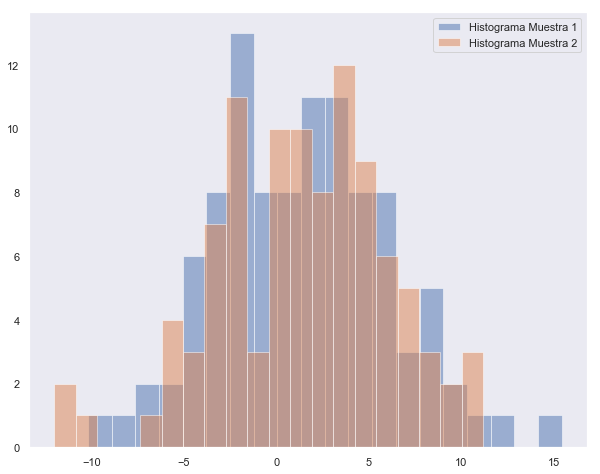

In [51]:
plt.figure(figsize = (10,8))
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histograma Muestra 2')
plt.legend()
plt.grid()
plt.show()